# **Decision Tree Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### **1. Reading of the processed dataset**

In [2]:
X_train = pd.read_csv('../data/processed/train_test/Xtrain.csv')
y_train = pd.read_csv('../data/processed/train_test/ytrain.csv')

X_test = pd.read_csv('../data/processed/train_test/Xtest.csv')
y_test = pd.read_csv('../data/processed/train_test/ytest.csv')

df = pd.read_csv('../data/processed/factorize_csv/madrid_fct.csv')
df

,LATITUD,LONGITUD,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N,PELIGROSIDAD_N
0,40.54035,-3.64525,1.045833,0,0,0,0,0
1,40.54035,-3.64525,0.966667,0,0,0,0,0
2,40.54035,-3.64525,1.175000,0,0,0,0,0
3,40.54035,-3.64525,1.087500,0,0,0,0,0
4,40.54035,-3.64525,0.429167,0,0,0,0,0
...,...,...,...,...,...,...,...,...
53926,40.24790,-4.27520,2.250000,9,7,1,1,0
53927,40.24790,-4.27520,2.791667,9,7,1,1,0
53928,40.24790,-4.27520,2.875000,9,7,1,1,0
53929,40.24790,-4.27520,3.000000,9,7,1,1,0


In [3]:
plt.figure(figsize=(12, 6))

# Use the PELIGROSIDAD_N column as the class_column parameter
pd.plotting.parallel_coordinates(df, class_column="PELIGROSIDAD_N", color=["#E58139", "#39E581", "#8139E5"])

plt.title("Parallel Coordinates Plot")
plt.ylabel("Variable Values")
plt.xlabel("Variables")
plt.legend(title="PELIGROSIDAD", loc="upper right")

plt.show()


### **2. Model initialisation and training**

In [ ]:
# Create and train the decision tree model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 23)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=23)

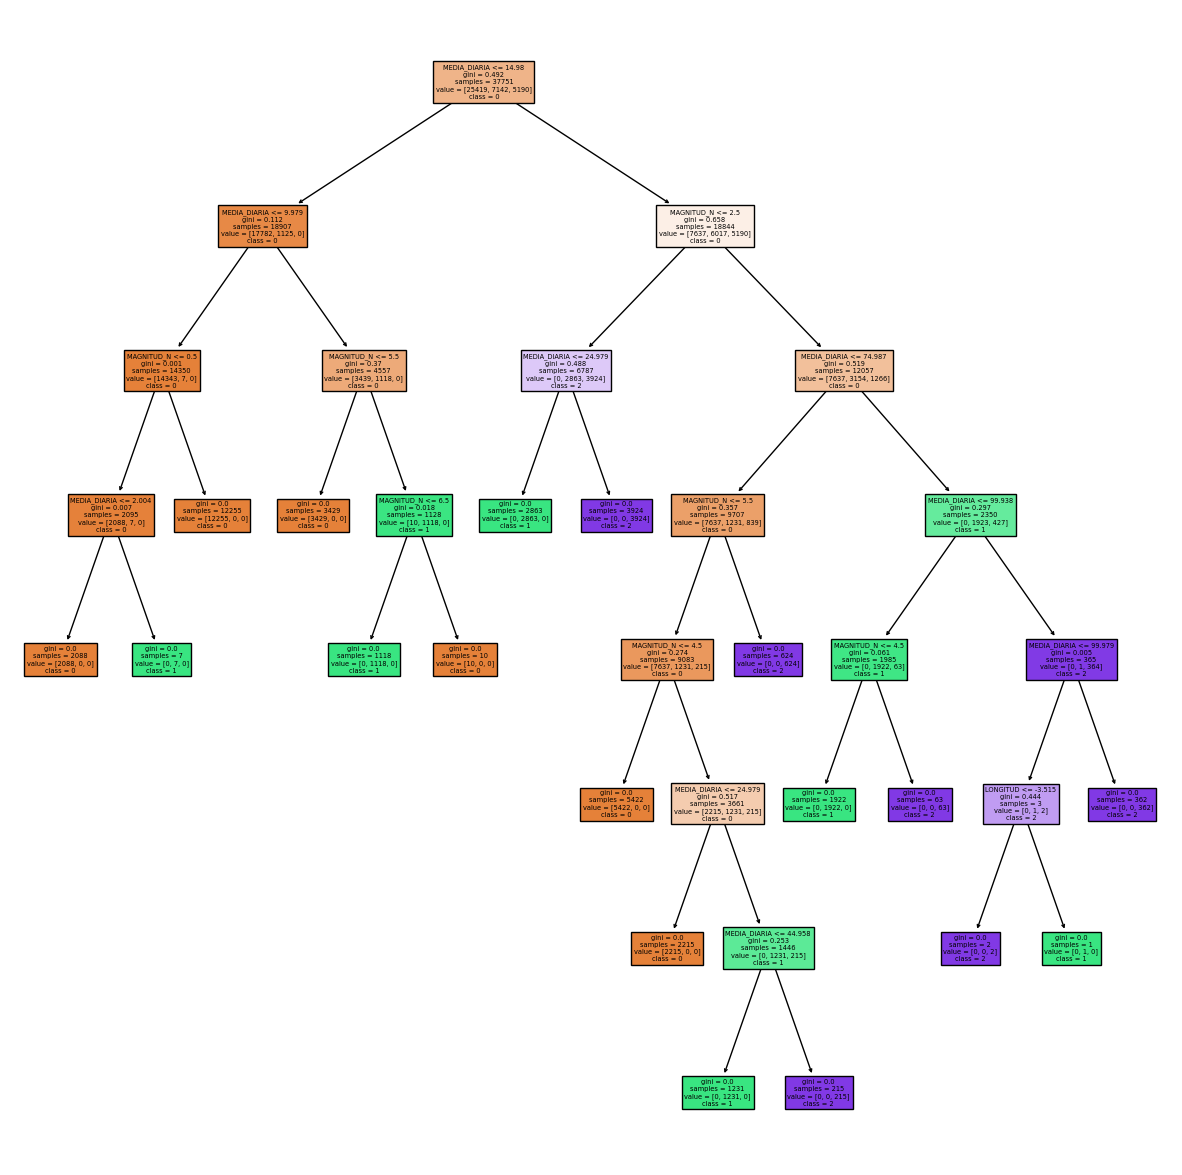

In [ ]:
# Visualise the decision tree
from sklearn import tree

fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### **3. Model prediction**

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 2, 0, 0])

In [ ]:
# model accuracy in the test set
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.999876390605686

In [ ]:
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_train

1.0

In [ ]:
if accuracy_train > accuracy_test:
    if accuracy_train - accuracy_test > 0.1:  # Un umbral de diferencia, p.ej., 10%
        print("Posible sobreajuste detectado.")
    else:
        print("Ligera diferencia en el rendimiento, pero no necesariamente sobreajuste.")
else:
    print("No hay signos evidentes de sobreajuste.")

Ligera diferencia en el rendimiento, pero no necesariamente sobreajuste.
